In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df = pd.read_csv('ppg_churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   5000 non-null   object 
 1   X02     5000 non-null   int64  
 2   X03     5000 non-null   object 
 3   X04     5000 non-null   object 
 4   X05     5000 non-null   object 
 5   X06     5000 non-null   int64  
 6   X07     5000 non-null   float64
 7   X08     5000 non-null   int64  
 8   X09     5000 non-null   float64
 9   X10     5000 non-null   float64
 10  X11     5000 non-null   int64  
 11  X12     5000 non-null   float64
 12  X13     5000 non-null   float64
 13  X14     5000 non-null   int64  
 14  X15     5000 non-null   float64
 15  X16     5000 non-null   float64
 16  X17     5000 non-null   int64  
 17  X18     5000 non-null   float64
 18  X19     5000 non-null   int64  
 19  churn   5000 non-null   object 
dtypes: float64(8), int64(7), object(5)
memory usage: 781.4+ KB


In [4]:
df.nunique()

state      51
X02       218
X03         3
X04         2
X05         2
X06        48
X07      1961
X08       123
X09      1961
X10      1879
X11       126
X12      1659
X13      1853
X14       131
X15      1028
X16       170
X17        21
X18       170
X19        10
churn       2
dtype: int64

In [5]:
df.loc[df.churn == 'yes'].shape[0] / df.shape[0]

0.1414

In [6]:
df_1 = df.copy()

In [7]:
df_1['c'] = np.where( df_1.churn == 'yes', '1','0')

In [8]:
df_1.c.value_counts()

0    4293
1     707
Name: c, dtype: int64

In [9]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   5000 non-null   object 
 1   X02     5000 non-null   int64  
 2   X03     5000 non-null   object 
 3   X04     5000 non-null   object 
 4   X05     5000 non-null   object 
 5   X06     5000 non-null   int64  
 6   X07     5000 non-null   float64
 7   X08     5000 non-null   int64  
 8   X09     5000 non-null   float64
 9   X10     5000 non-null   float64
 10  X11     5000 non-null   int64  
 11  X12     5000 non-null   float64
 12  X13     5000 non-null   float64
 13  X14     5000 non-null   int64  
 14  X15     5000 non-null   float64
 15  X16     5000 non-null   float64
 16  X17     5000 non-null   int64  
 17  X18     5000 non-null   float64
 18  X19     5000 non-null   int64  
 19  churn   5000 non-null   object 
 20  c       5000 non-null   object 
dtypes: float64(8), int64(7), object(6)
me

In [10]:
df_1 = df_1.drop(columns=['churn'])

In [11]:
df_1['c'] = df_1.c.astype(int)

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   5000 non-null   object 
 1   X02     5000 non-null   int64  
 2   X03     5000 non-null   object 
 3   X04     5000 non-null   object 
 4   X05     5000 non-null   object 
 5   X06     5000 non-null   int64  
 6   X07     5000 non-null   float64
 7   X08     5000 non-null   int64  
 8   X09     5000 non-null   float64
 9   X10     5000 non-null   float64
 10  X11     5000 non-null   int64  
 11  X12     5000 non-null   float64
 12  X13     5000 non-null   float64
 13  X14     5000 non-null   int64  
 14  X15     5000 non-null   float64
 15  X16     5000 non-null   float64
 16  X17     5000 non-null   int64  
 17  X18     5000 non-null   float64
 18  X19     5000 non-null   int64  
 19  c       5000 non-null   int32  
dtypes: float64(8), int32(1), int64(7), object(4)
memory usage: 761.8+ KB


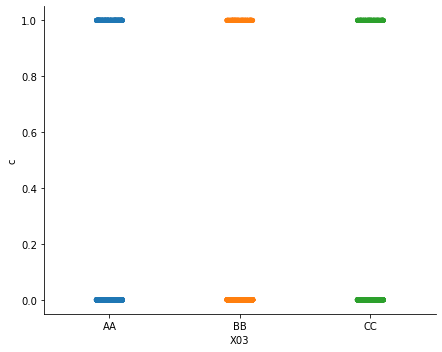

In [13]:
sns.catplot(data=df_1, x='X03', y='c', ci=95, aspect=1.25)

plt.show()

In [14]:
df_clean = df.select_dtypes('number').copy()

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
X = StandardScaler().fit_transform(df_clean)

In [17]:
df_X = pd.DataFrame(X, columns=df_clean.columns)

In [18]:
df_X.head()

,X02,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,0.698941,1.273145,1.573802,0.502824,1.574074,-0.064032,-0.060077,-0.063849,0.876999,-0.446928,0.876286,-0.094809,-0.584236,-0.095509,-0.436676
1,0.169849,1.346973,-0.346802,1.158422,-0.347082,-0.101621,0.141693,-0.101089,1.068992,0.154374,1.069818,1.245227,-0.584236,1.245982,-0.436676
2,0.925695,-0.572549,1.171125,0.704546,1.171286,-1.571562,0.494791,-1.572084,-0.748012,0.204483,-0.746737,0.701969,0.229917,0.695971,-1.202236
3,-0.409634,-0.572549,2.210292,-1.463971,2.210457,-2.744745,-0.614946,-2.745155,-0.069110,-0.547145,-0.069377,-1.326194,1.044069,-1.329681,0.328885
4,-0.636388,-0.572549,-0.252163,0.654116,-0.252115,-1.035419,1.100103,-1.034426,-0.267041,1.056327,-0.267307,-0.058592,-0.584236,-0.055264,1.094445


In [19]:
df_X['churn'] = df_1.c.copy()

In [20]:
df_X_all = df_X.copy()

In [21]:
df_X_all['state'] = df.state.copy()

In [22]:
df_X_all['X03'] = df.X03.copy()

In [23]:
df_X_all['X04'] = df.X04.copy()

In [24]:
df_X_all['X05'] = df.X05.copy()

In [25]:
df['y'] = df_1.c.copy()

In [26]:
df = df.drop(columns=['churn'])

In [27]:
df.head()

,state,X02,X03,X04,X05,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,y
0,KS,128,AA,Z1,V1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,AA,Z1,V1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,AA,Z1,V2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,BB,Z2,V2,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,AA,Z2,V2,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [28]:
df_clean.head()

,X02,X06,X07,X08,X09,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [29]:
num_inputs = df_1.select_dtypes('number').copy().columns.to_list()

In [30]:
lf_num = df_1.melt(id_vars=['c','X03','X04','X05'], value_vars = num_inputs, ignore_index=True)

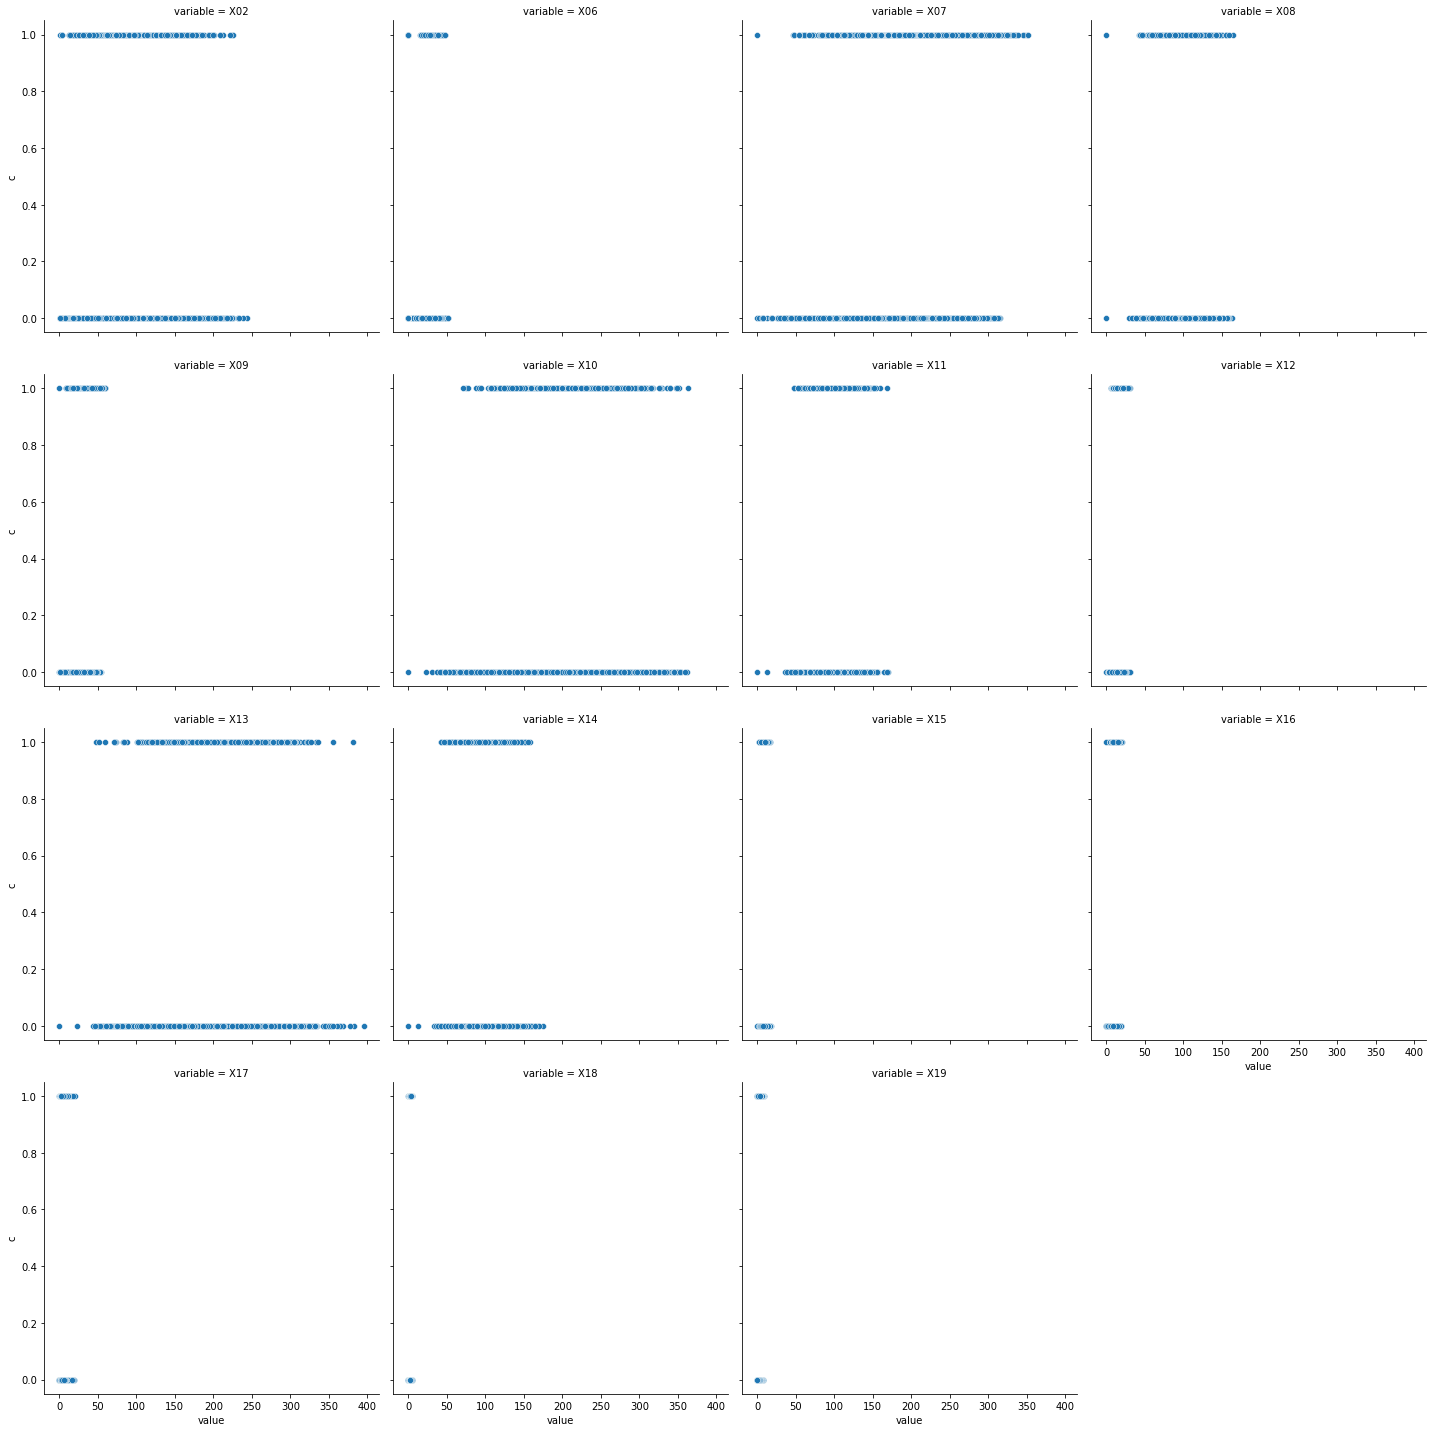

In [31]:
sns.relplot(data = lf_num, x='value', y='c', col='variable', col_wrap=4)

plt.show()

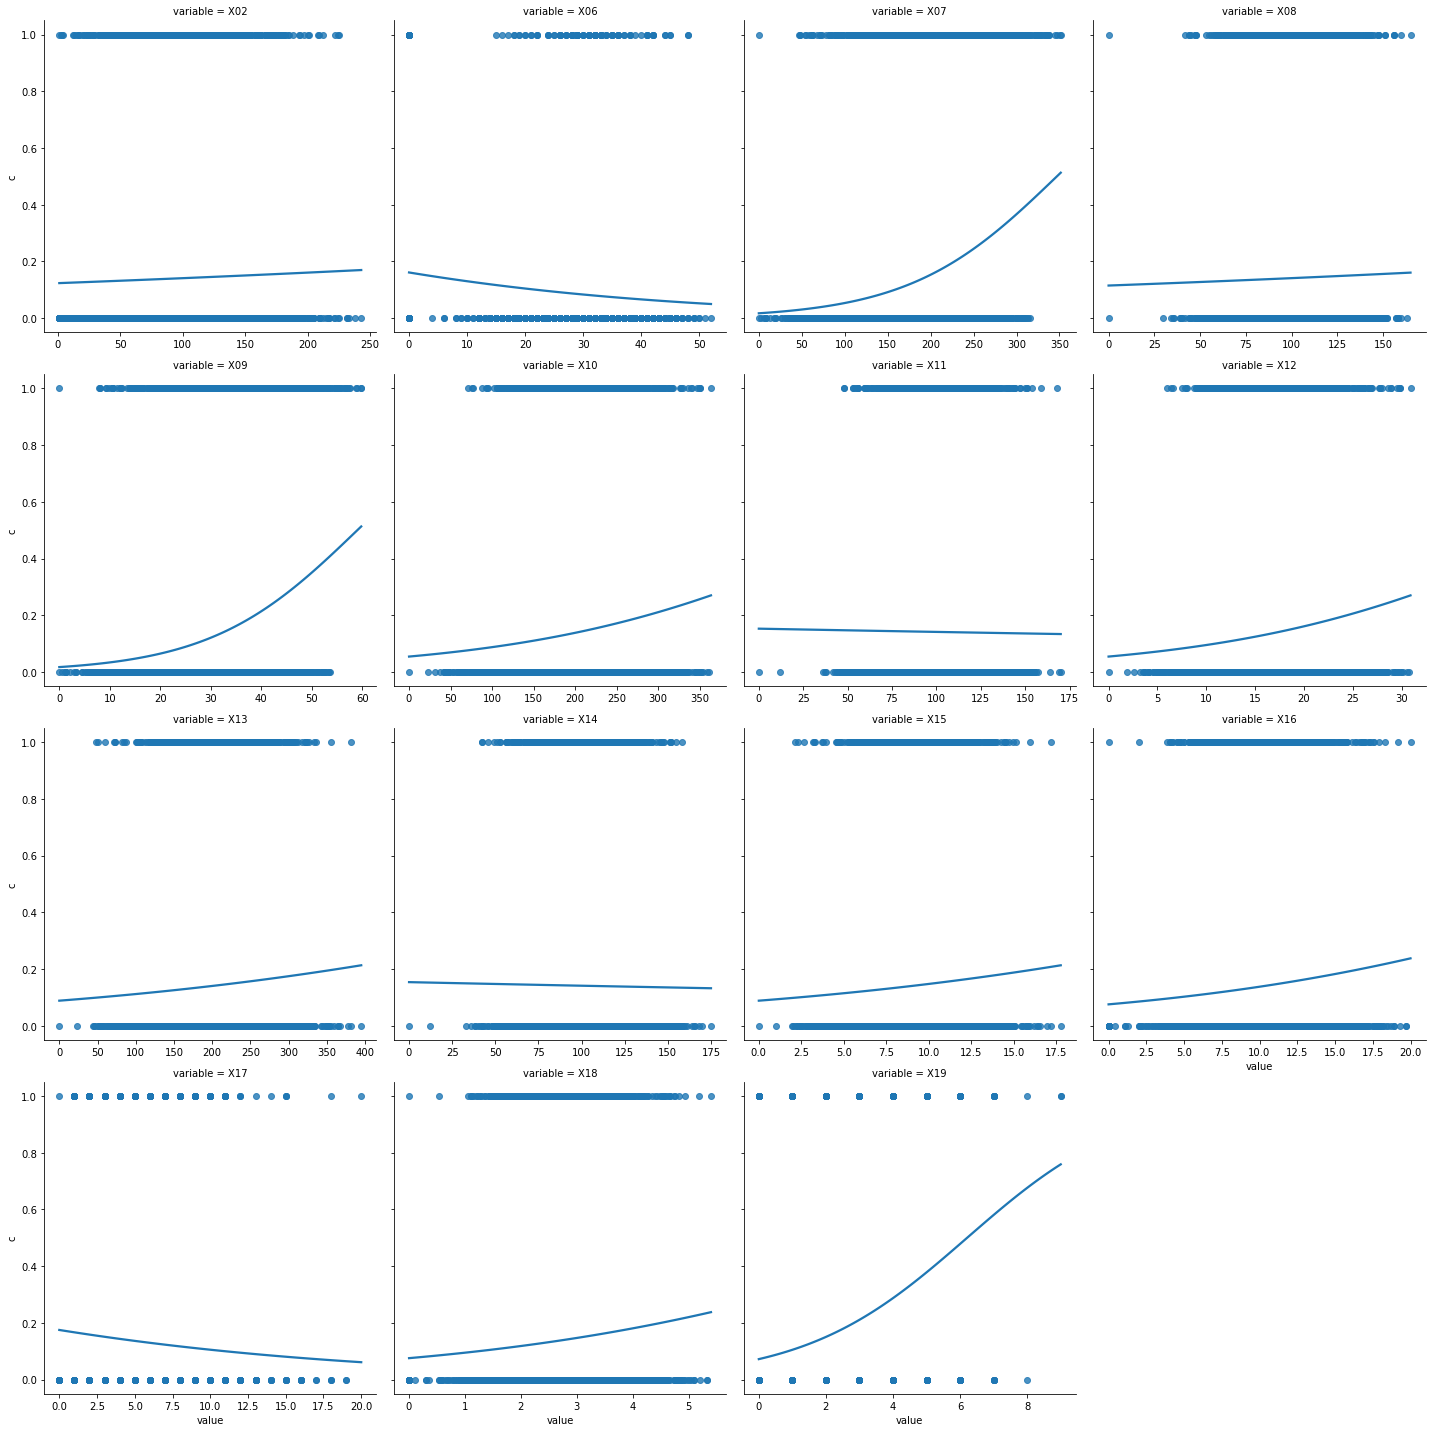

In [32]:
sns.lmplot(data = lf_num, x='value', y='c', col='variable', logistic=True, col_wrap=4, ci=None,
           facet_kws={'sharey':True, 'sharex':False})

plt.show()

From the above figure we can observe that for the variables `X07`, `X09`, `X12`, `X16` the output of the churn will be yes when the value of these variables inreases.

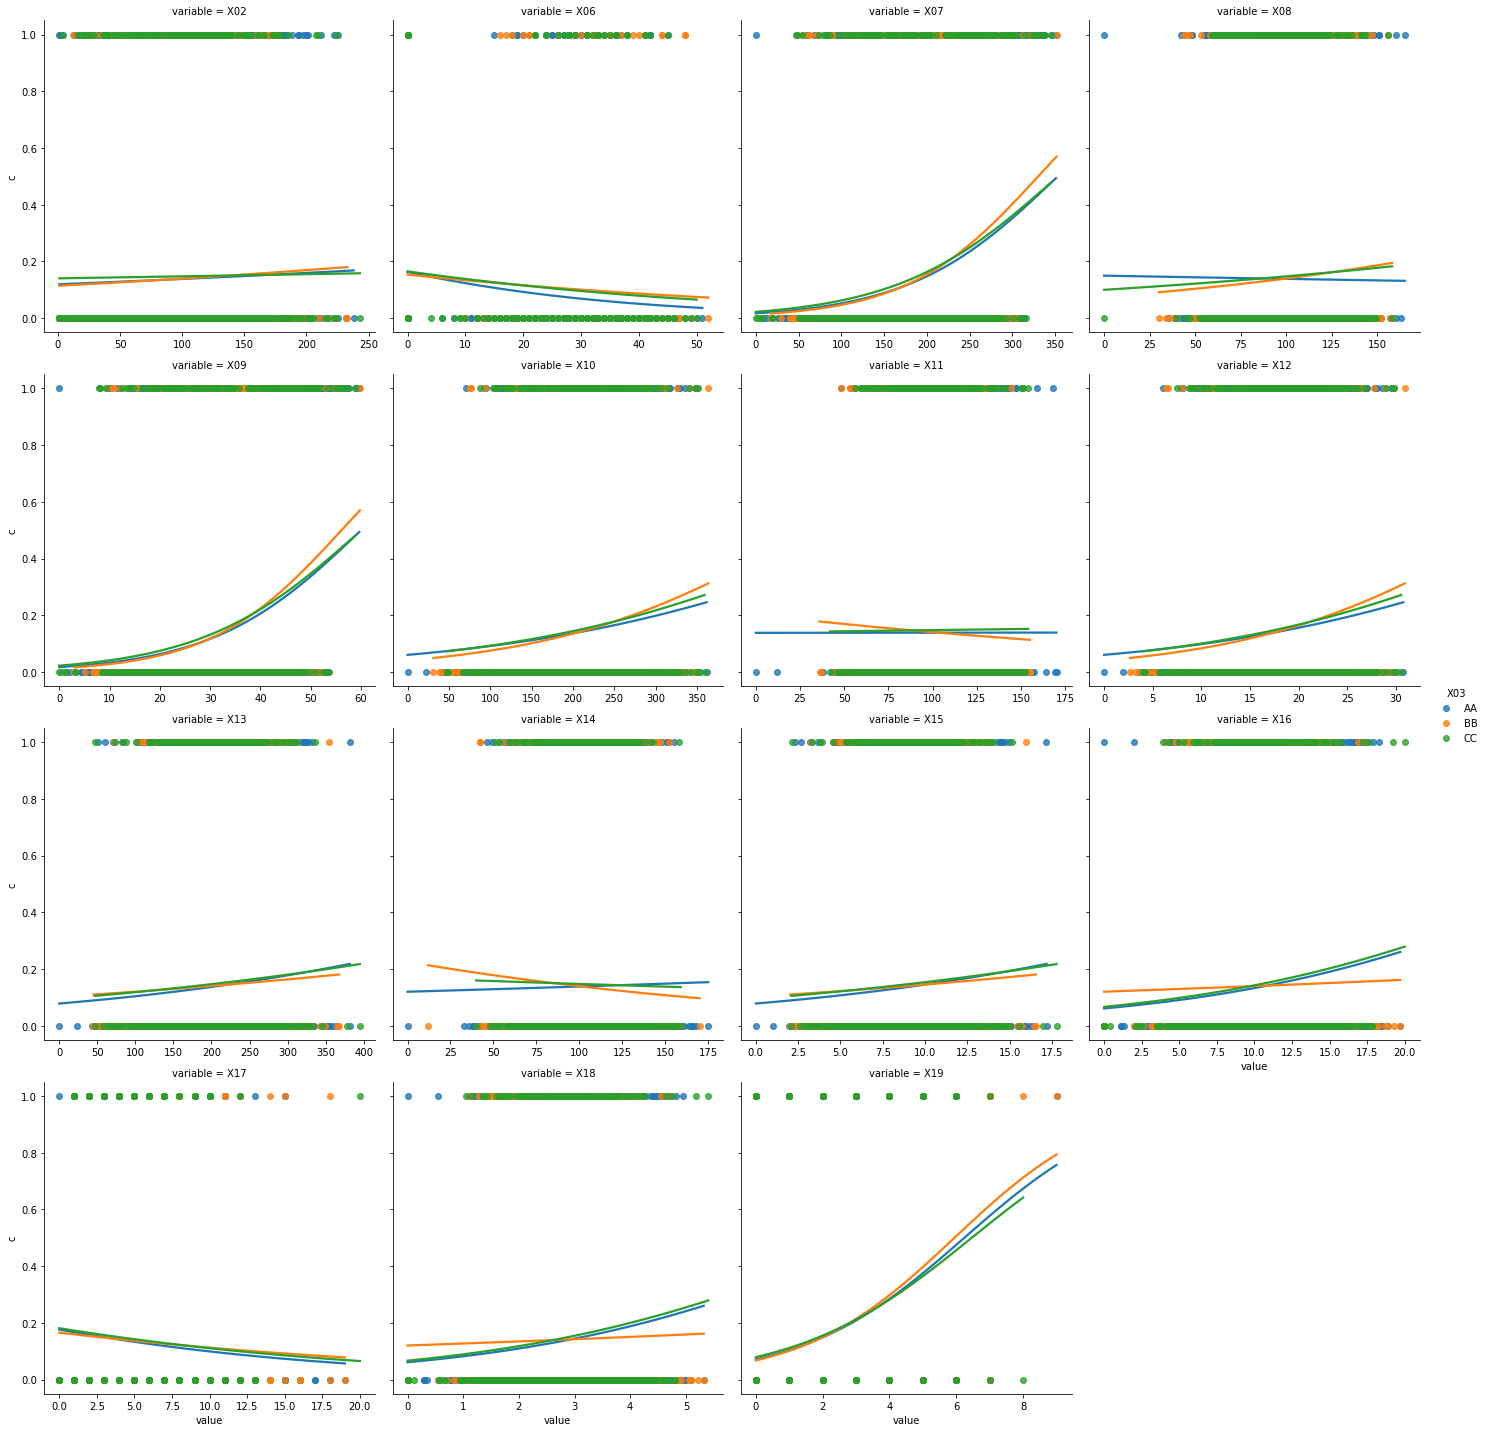

In [33]:
sns.lmplot(data = lf_num, x='value', y='c', hue='X03',col='variable', logistic=True, col_wrap=4, ci=None,
           facet_kws={'sharey':True, 'sharex':False})

plt.show()

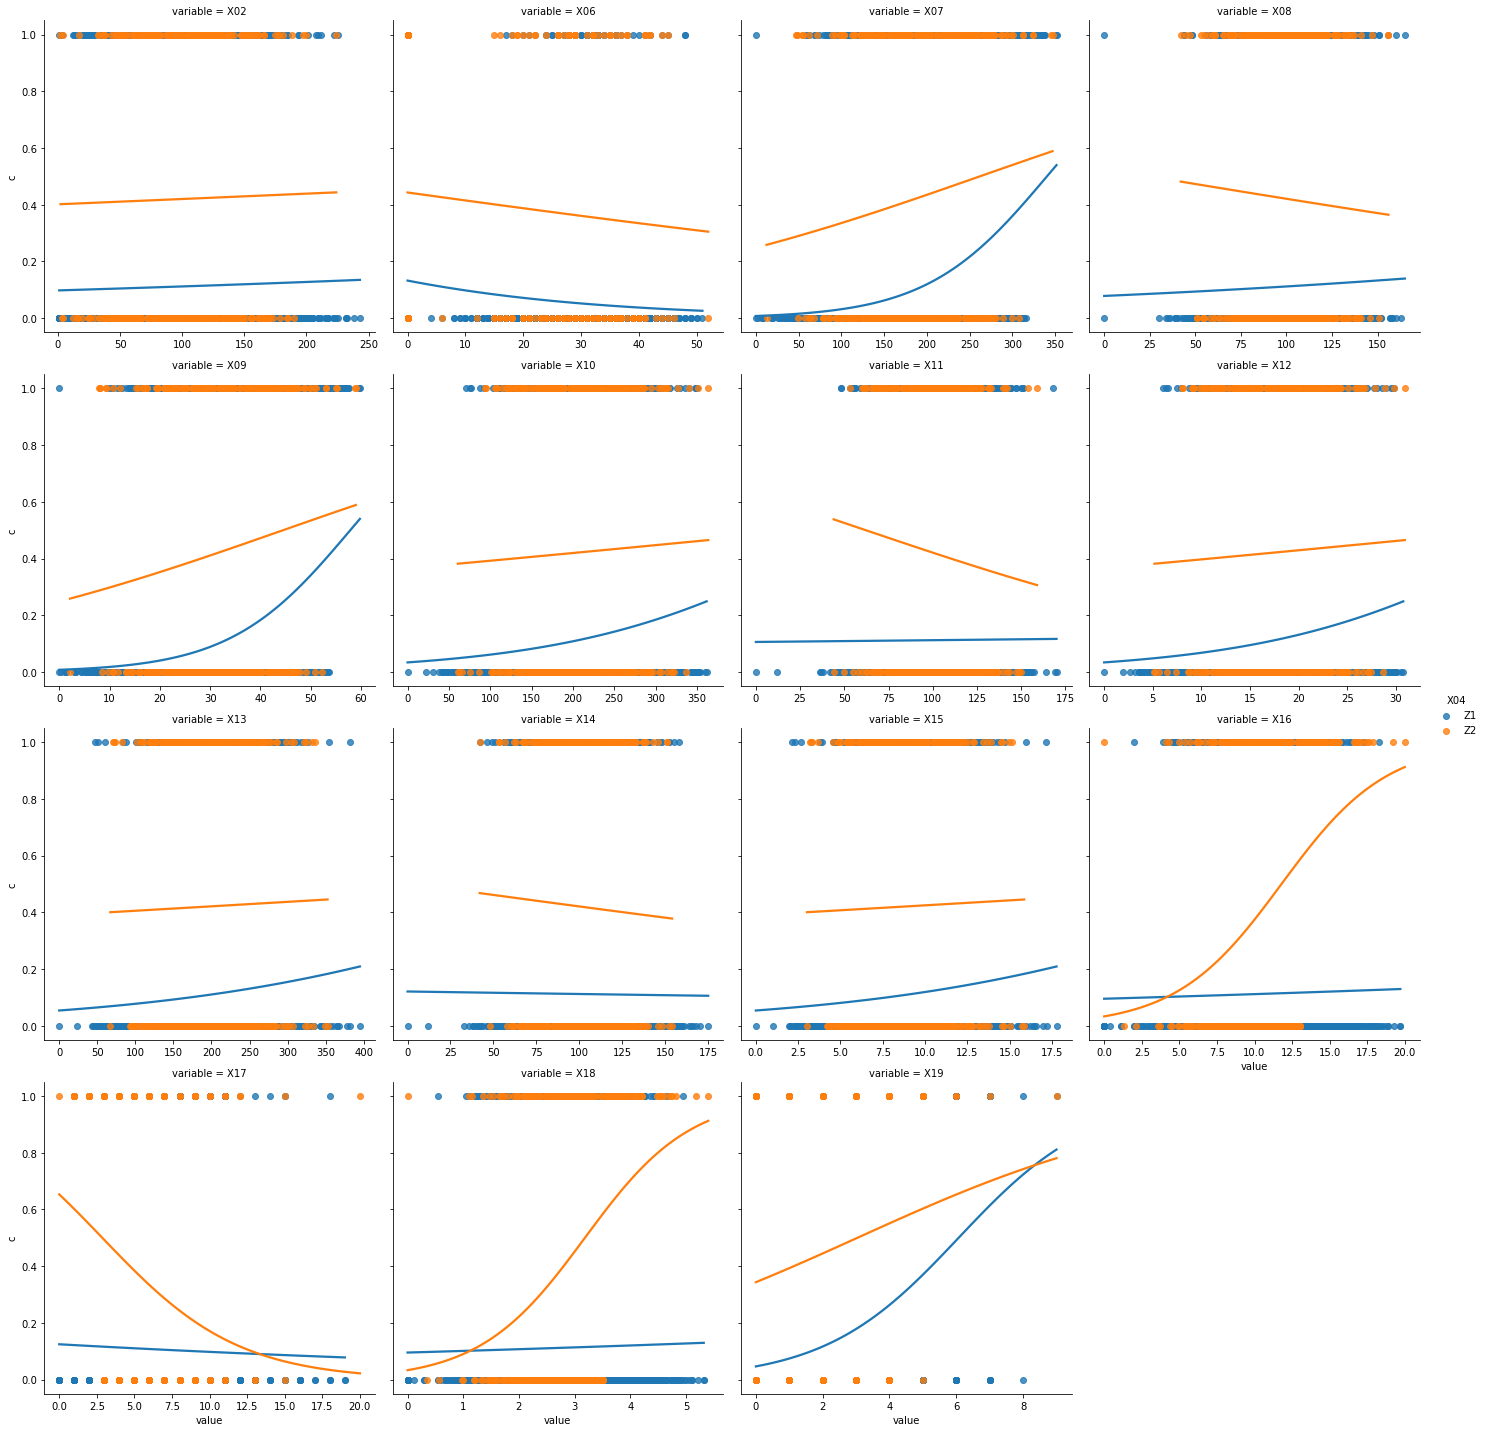

In [34]:
sns.lmplot(data = lf_num, x='value', y='c', hue='X04',col='variable', logistic=True, col_wrap=4, ci=None,
           facet_kws={'sharey':True, 'sharex':False})

plt.show()

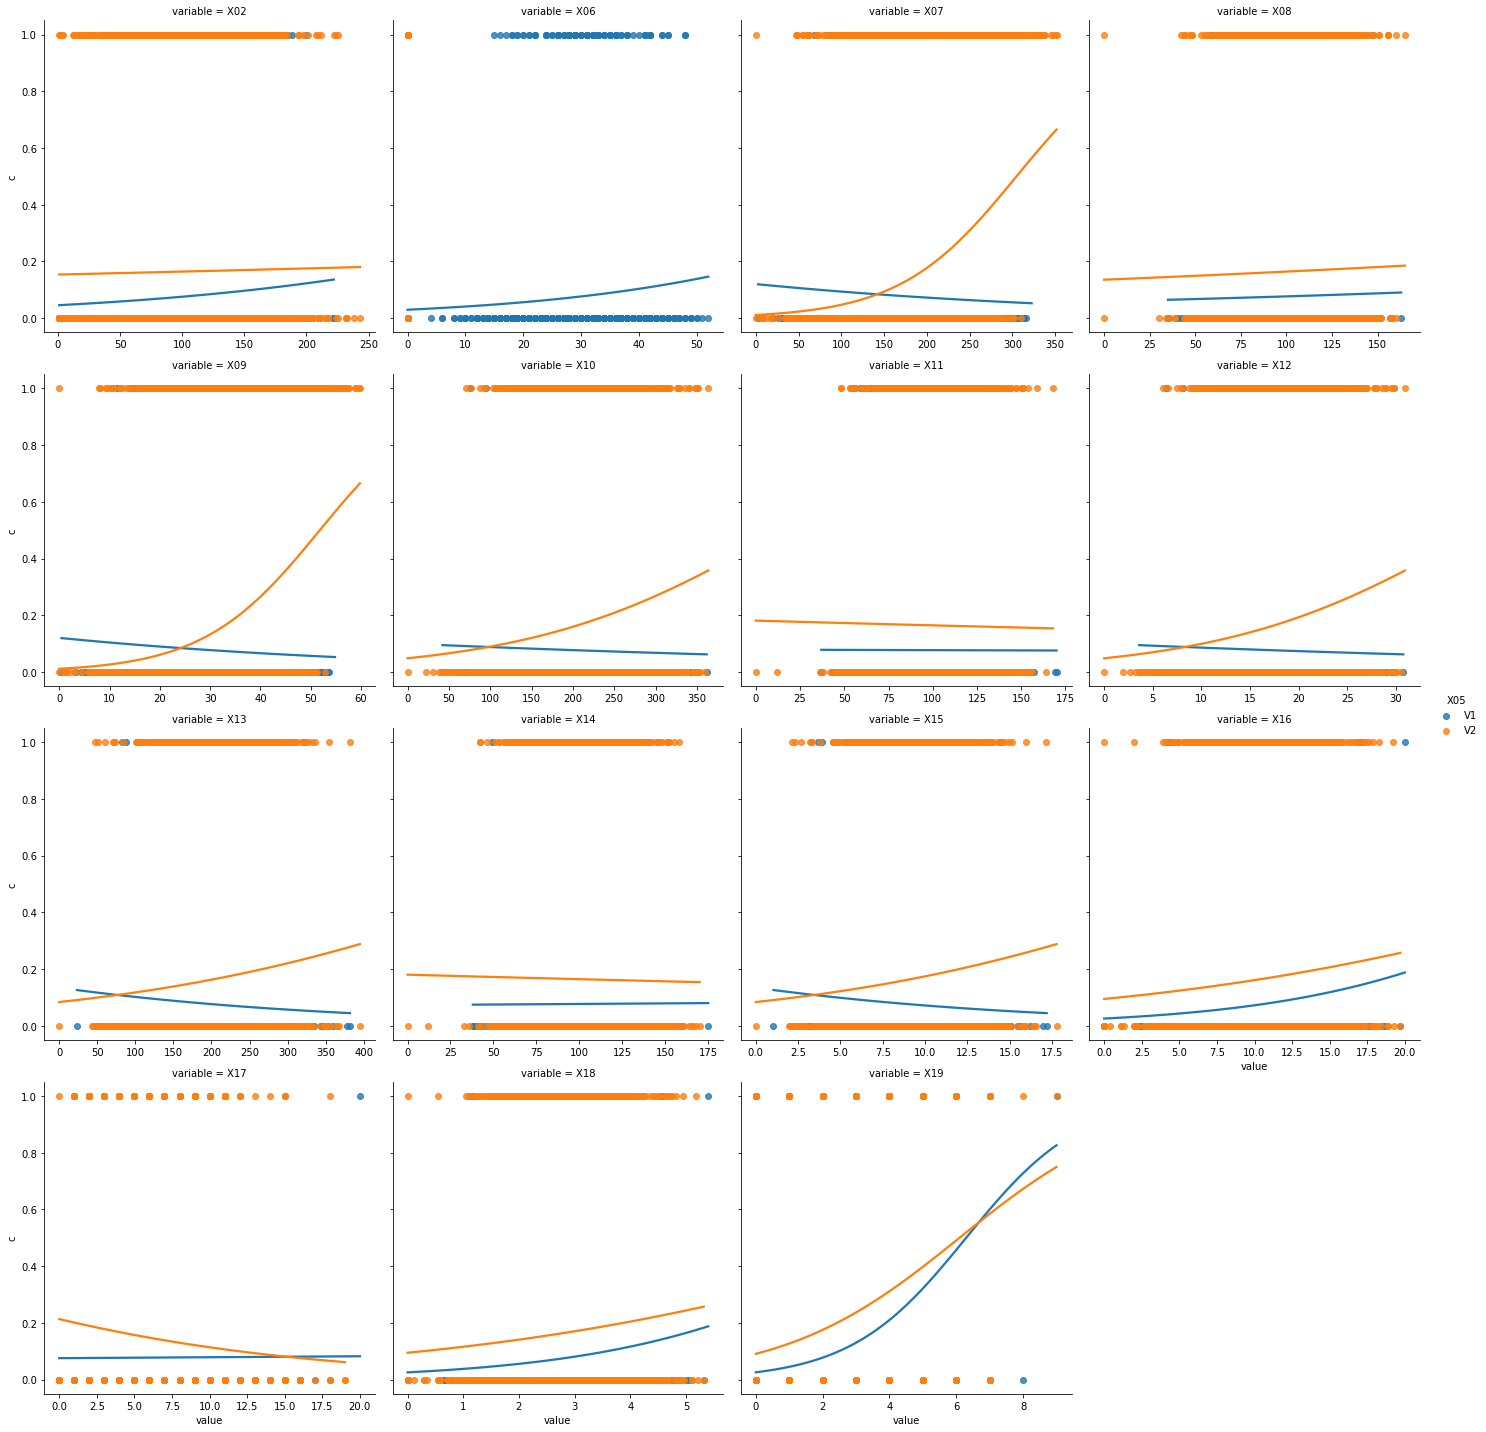

In [35]:
sns.lmplot(data = lf_num, x='value', y='c', hue='X05',col='variable', logistic=True, col_wrap=4, ci=None,
           facet_kws={'sharey':True, 'sharex':False})

plt.show()

From EDA we observed that the variables `X06`, 'X17' and 'X19' does not have gaussian-like graph. So we will try out different cases in which each one of these variables will be tested either as categorical or continuous.

## Case-1 All variables treated as continuous

*** First we will train all models considering `X06`, `X17` and `X19` as continuos and ignore zero inflated behaviour of the `X06` variable. ***

So for these variables to be treated as continuos we will not change anything and use the original dataset.

##### Fitting the logistic regression models

In [36]:
import statsmodels.formula.api as smf

1 - Only continuous inputs with additive terms

In [37]:
formula = 'churn ~ X02 + X06 + X07 + X08 + X09 + X10 + X11 + X12 + X13 + X14 + X15 + X16 + X17 + X18 + X19'

In [38]:
formula_1 = 'churn ~ (X02 + X06 + X07 + X08 + X09 + X10 + X11 + X12 + X13 + X14 + X15 + X16 + X17 + X18 + X19) ** 2'

In [39]:
fit_01 = smf.logit(formula = formula, data=df_X).fit()

Optimization terminated successfully.
         Current function value: 0.346666
         Iterations 8


In [40]:
print( fit_01.summary() )

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4984
Method:                           MLE   Df Model:                           15
Date:                Tue, 14 Dec 2021   Pseudo R-squ.:                  0.1493
Time:                        04:35:24   Log-Likelihood:                -1733.3
converged:                       True   LL-Null:                       -2037.5
Covariance Type:            nonrobust   LLR p-value:                6.085e-120
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1846      0.054    -40.754      0.000      -2.290      -2.080
X02            0.0656      0.044      1.505      0.132      -0.020       0.151
X06           -0.3884      0.053     -7.368      0.0

In [41]:
def my_coefplot(model_object, figsize_use=(10,5)):
    fig, ax = plt.subplots(figsize=figsize_use)
    
    ax.errorbar(y = model_object.params.index,
                x = model_object.params,
                xerr = 2 * model_object.bse,
                fmt='o', color='black', ecolor='black',
                elinewidth=3, ms=10)
    
    ax.axvline(x=0, linestyle='--', linewidth=5, color='grey')
    
    ax.set_xlabel('coefficient value')
    
    plt.show()

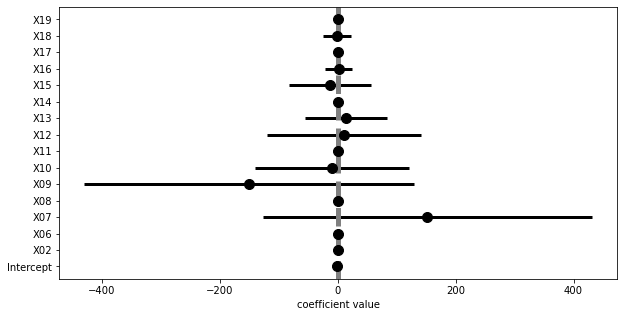

In [42]:
my_coefplot(fit_01)

From the above figure we can observe that only the intercept is statistically significant.

2 - Only continuous inputs with interaction terms

In [43]:
formula_1 = 'churn ~ (X02 + X06 + X07 + X08 + X09 + X10 + X11 + X12 + X13 + X14 + X15 + X16 + X17 + X18 + X19) ** 2'

In [44]:
fit_02 = smf.logit(formula = formula_1, data=df_X).fit()

         Current function value: 0.264487
         Iterations: 35


C:\Users\Vedant\anaconda3\envs\cmpinf2100\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
fit_03 = smf.logit(formula = 'y~ state + X03 + X04 + X05', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.363846
         Iterations 7


In [46]:
print( fit_03.summary() )

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4945
Method:                           MLE   Df Model:                           54
Date:                Tue, 14 Dec 2021   Pseudo R-squ.:                  0.1071
Time:                        04:35:25   Log-Likelihood:                -1819.2
converged:                       True   LL-Null:                       -2037.5
Covariance Type:            nonrobust   LLR p-value:                 2.985e-61
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.6006      0.488     -7.371      0.000      -4.558      -2.643
state[T.AL]     0.4179      0.566      0.738      0.460      -0.691       1.527
state[T.AR]     1.0372      0.560      1.854    

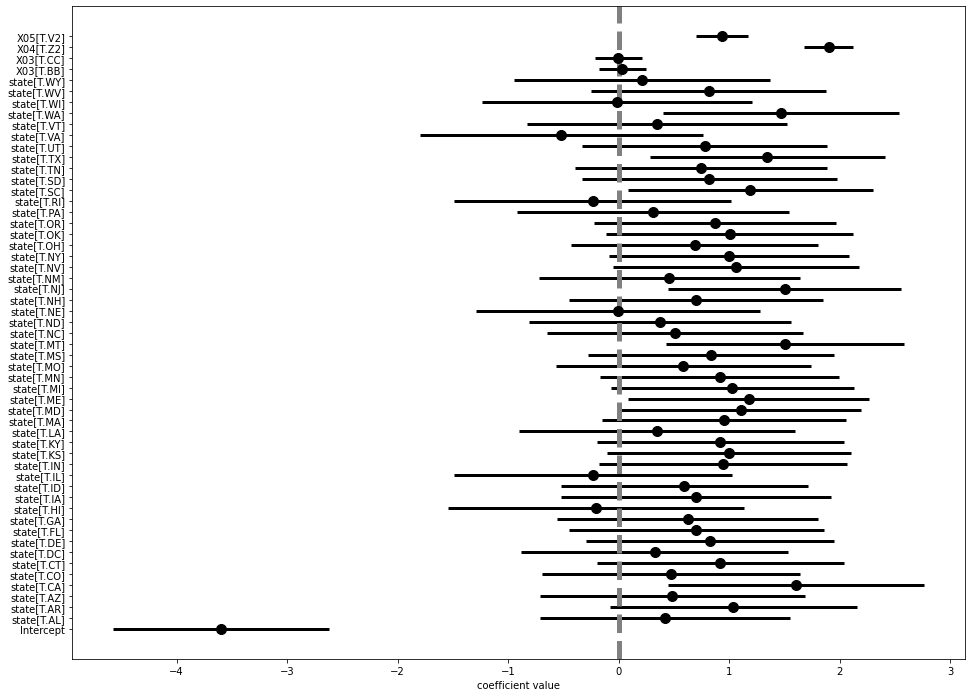

In [47]:
my_coefplot(fit_03, figsize_use=(16, 12))

In [48]:
formula_4 = 'churn ~ state + X02 + X03 + X04 + X05 + X06 + X07 + X08 + X09 + X10 + X11 + X12 + X13 + X14 + X15 + X16 + X17 + X18 + X19'

In [49]:
fit_04 = smf.logit(formula=formula_4, data = df_X_all).fit()

Optimization terminated successfully.
         Current function value: 0.305387
         Iterations 10


In [50]:
print(fit_04.summary())

                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4930
Method:                           MLE   Df Model:                           69
Date:                Tue, 14 Dec 2021   Pseudo R-squ.:                  0.2506
Time:                        04:35:26   Log-Likelihood:                -1526.9
converged:                       True   LL-Null:                       -2037.5
Covariance Type:            nonrobust   LLR p-value:                2.075e-169
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -4.9192      0.626     -7.855      0.000      -6.147      -3.692
state[T.AL]     0.3291      0.597      0.551      0.582      -0.841       1.499
state[T.AR]     0.9234      0.600      1.540    

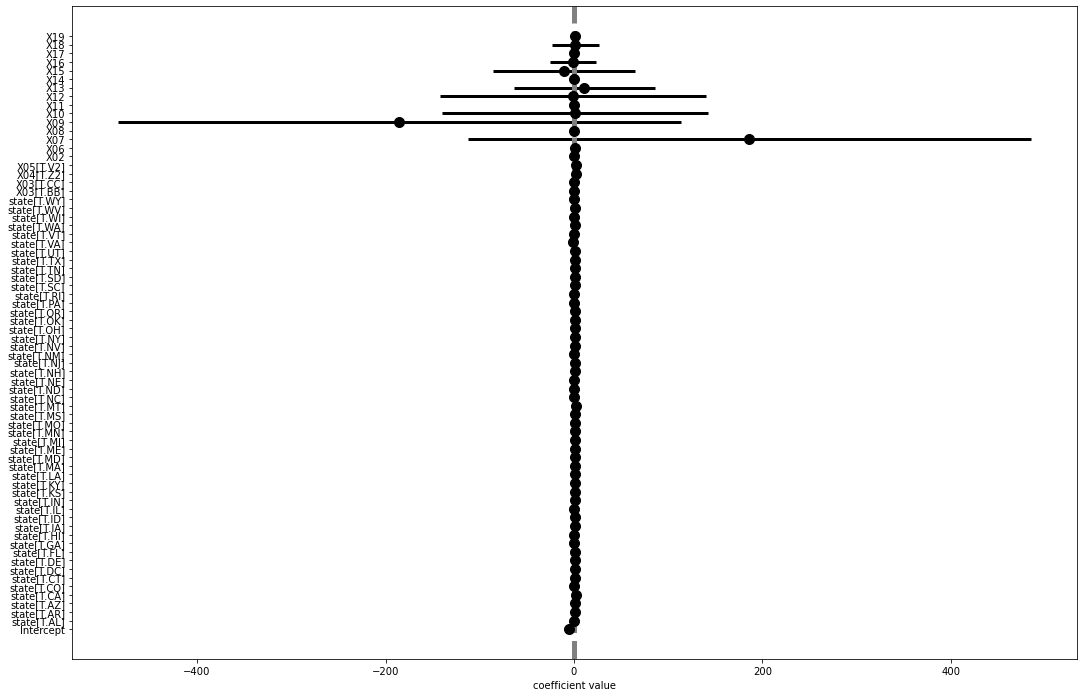

In [51]:
my_coefplot(fit_04, figsize_use=(18, 12))

In [52]:
formula_5 = 'churn ~ (state + X02 + X03 + X04 + X05 + X06 + X07 + X08 + X09 + X10 + X11 + X12 + X13 + X14 + X15 + X16 + X17 + X18 + X19) ** 2'

In [53]:
fit_05 = smf.logit(formula=formula_5, data = df_X_all).fit()

C:\Users\Vedant\anaconda3\envs\cmpinf2100\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\Vedant\anaconda3\envs\cmpinf2100\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix